In [1]:
import numpy as np
import numpy.linalg as la

In [2]:
datasets = ['CIFAR', 'MNIST']
net_names = ['ConvBig', 'ConvMed', 'FFNN']
perturbations = ['Haze', 'ContrastVariation', 'Rotation']

In [3]:
import re

class Interval:
    def __init__(self, interval_str):
        m = re.match(r'\[(.*),(.*)\]', interval_str)
        self.lower, self.upper = float(m.group(1)), float(m.group(2))
    def get_abs_max(self):
        return max(abs(self.lower), abs(self.upper))

In [4]:
from statistics import median

NUM_IMAGES = 100

all_data = {}

for dataset in datasets:
    all_data[dataset] = {}
    for net in net_names:
        all_data[dataset][net] = {}
        for perturbation in perturbations:
            
            all_data[dataset][net][perturbation] = {}
            filename = f'results/results_nosplit/{net}_{dataset}_{perturbation}_nosplit.txt'
            with open(filename) as f:
                content = f.readlines()
            content = [x.strip() for x in content] 
            data = []
            for header, arr in zip(content[::2], content[1::2]):
                items = header.split(',')
                interval_size = float(items[4])
                time = float(items[6])
                
                # FOR LIPSCHITZ CONSTANT
                jacobians = np.array(list(map(lambda x: Interval(x).get_abs_max(), arr.split(';')[:-1]))).reshape(NUM_IMAGES, 10)
                
                avg_norm = 0
                for jacobi in jacobians:
                    avg_norm += la.norm(jacobi, np.inf)
                avg_norm /= NUM_IMAGES                
                data.append((interval_size, time, avg_norm))
            
            all_data[dataset][net][perturbation] = data

In [5]:
NUM_IMAGES = 100

all_data_splitting2 = {}

for dataset in datasets:
    all_data_splitting2[dataset] = {}
    for net in net_names:
        all_data_splitting2[dataset][net] = {}
        for perturbation in perturbations:  
            all_data_splitting2[dataset][net][perturbation] = {}
            filename = f'results/results_split2/{net}_{dataset}_{perturbation}_split2.txt'
            with open(filename) as f:
                content = f.readlines()
            content = [x.strip() for x in content] 
            data = []
            for header, arr in zip(content[::2], content[1::2]):
                items = header.split(',')
                interval_size = float(items[4])
                time = float(items[7])
                
                # FOR LIPSCHITZ CONSTANT
                jacobians = np.array(list(map(lambda x: Interval(x).get_abs_max(), arr.split(';')[:-1]))).reshape(NUM_IMAGES, 10*2)
                
                avg_norm = 0
                for jacobi in jacobians:
                    nom = 0
                    for k in range(2):
                        nom = max(nom, la.norm(jacobi[k*10:(k+1)*10], np.inf))
                    avg_norm += nom
                avg_norm /= NUM_IMAGES
                
                data.append((interval_size, time, avg_norm))
            
            all_data_splitting2[dataset][net][perturbation] = data

In [6]:
NUM_IMAGES = 100

all_data_splitting5 = {}

for dataset in datasets:
    all_data_splitting5[dataset] = {}
    for net in net_names:
        all_data_splitting5[dataset][net] = {}
        for perturbation in perturbations:  
            all_data_splitting5[dataset][net][perturbation] = {}
            filename = f'results/results_split5/{net}_{dataset}_{perturbation}_split5.txt'
            with open(filename) as f:
                content = f.readlines()
            content = [x.strip() for x in content] 
            data = []
            for header, arr in zip(content[::2], content[1::2]):
                items = header.split(',')
                interval_size = float(items[4])
                time = float(items[7])
                
                # FOR LIPSCHITZ CONSTANT
                jacobians = np.array(list(map(lambda x: Interval(x).get_abs_max(), arr.split(';')[:-1]))).reshape(NUM_IMAGES, 10*5)

                avg_norm = 0
                for jacobi in jacobians:
                    nom = 0
                    for k in range(5):
                        nom = max(nom, la.norm(jacobi[k*10:(k+1)*10], np.inf))
                    avg_norm += nom
                avg_norm /= NUM_IMAGES
                
                data.append((interval_size, time, avg_norm))
            
            all_data_splitting5[dataset][net][perturbation] = data

In [7]:
from operator import itemgetter

NUM_IMAGES = 100

all_data_splitting9 = {}

for dataset in datasets:
    all_data_splitting9[dataset] = {}
    for net in net_names:
        all_data_splitting9[dataset][net] = {}
        for perturbation in perturbations:  
            all_data_splitting9[dataset][net][perturbation] = {}
            filename = f'results/results_split9/{net}_{dataset}_{perturbation}_split9.txt'
            with open(filename) as f:
                content = f.readlines()
            content = [x.strip() for x in content] 
            data = []
            for header, arr in zip(content[::2], content[1::2]):
                items = header.split(',')
                interval_size = float(items[4])
                time = float(items[7])
                
                # FOR LIPSCHITZ CONSTANT
                jacobians = np.array(list(map(lambda x: Interval(x).get_abs_max(), arr.split(';')[:-1]))).reshape(NUM_IMAGES, 10*9)

                avg_norm = 0
                for jacobi in jacobians:
                    nom = 0
                    for k in range(9):
                        nom = max(nom, la.norm(jacobi[k*10:(k+1)*10], np.inf))
                    avg_norm += nom
                avg_norm /= NUM_IMAGES
                
                data.append((interval_size, time, avg_norm))
            
            data.sort(key=itemgetter(0))
            all_data_splitting9[dataset][net][perturbation] = data

In [8]:
NUM_IMAGES = 100

all_data_splitting25 = {}

for dataset in datasets:
    all_data_splitting25[dataset] = {}
    for net in net_names:
        all_data_splitting25[dataset][net] = {}
        for perturbation in perturbations:  
            all_data_splitting25[dataset][net][perturbation] = {}
            filename = f'results/results_split25/{net}_{dataset}_{perturbation}_split25.txt'
            with open(filename) as f:
                content = f.readlines()
            content = [x.strip() for x in content] 
            data = []
            for header, arr in zip(content[::2], content[1::2]):
                items = header.split(',')
                interval_size = float(items[4])
                time = float(items[7])
                
                # FOR LIPSCHITZ CONSTANT
                jacobians = np.array(list(map(lambda x: Interval(x).get_abs_max(), arr.split(';')[:-1]))).reshape(NUM_IMAGES, 10*25)

                avg_norm = 0
                for jacobi in jacobians:
                    nom = 0
                    for k in range(25):
                        nom = max(nom, la.norm(jacobi[k*10:(k+1)*10], np.inf))
                    avg_norm += nom
                avg_norm /= NUM_IMAGES
                
                data.append((interval_size, time, avg_norm))
                
            data.sort(key=itemgetter(0))
            all_data_splitting25[dataset][net][perturbation] = data

In [9]:
network_baselines = {'FFNN': {'CIFAR':(97618464.0, 14.711), 'MNIST':(165186992.0, 8.205)},
                    'ConvMed': {'CIFAR':(64603.76171875, 2.042), 'MNIST':(92872.0859375, 2.746)},
                    'ConvBig': {'CIFAR':(1587185536.0, 11.289), 'MNIST':(3638838016.0, 8.871)}}
normalize_constants = {'MNIST': 1/0.3081, 'CIFAR': 1/0.1994}

import pandas as pd
df = pd.read_csv('results/results_baseline/perturbation_baseline.csv', index_col=None)

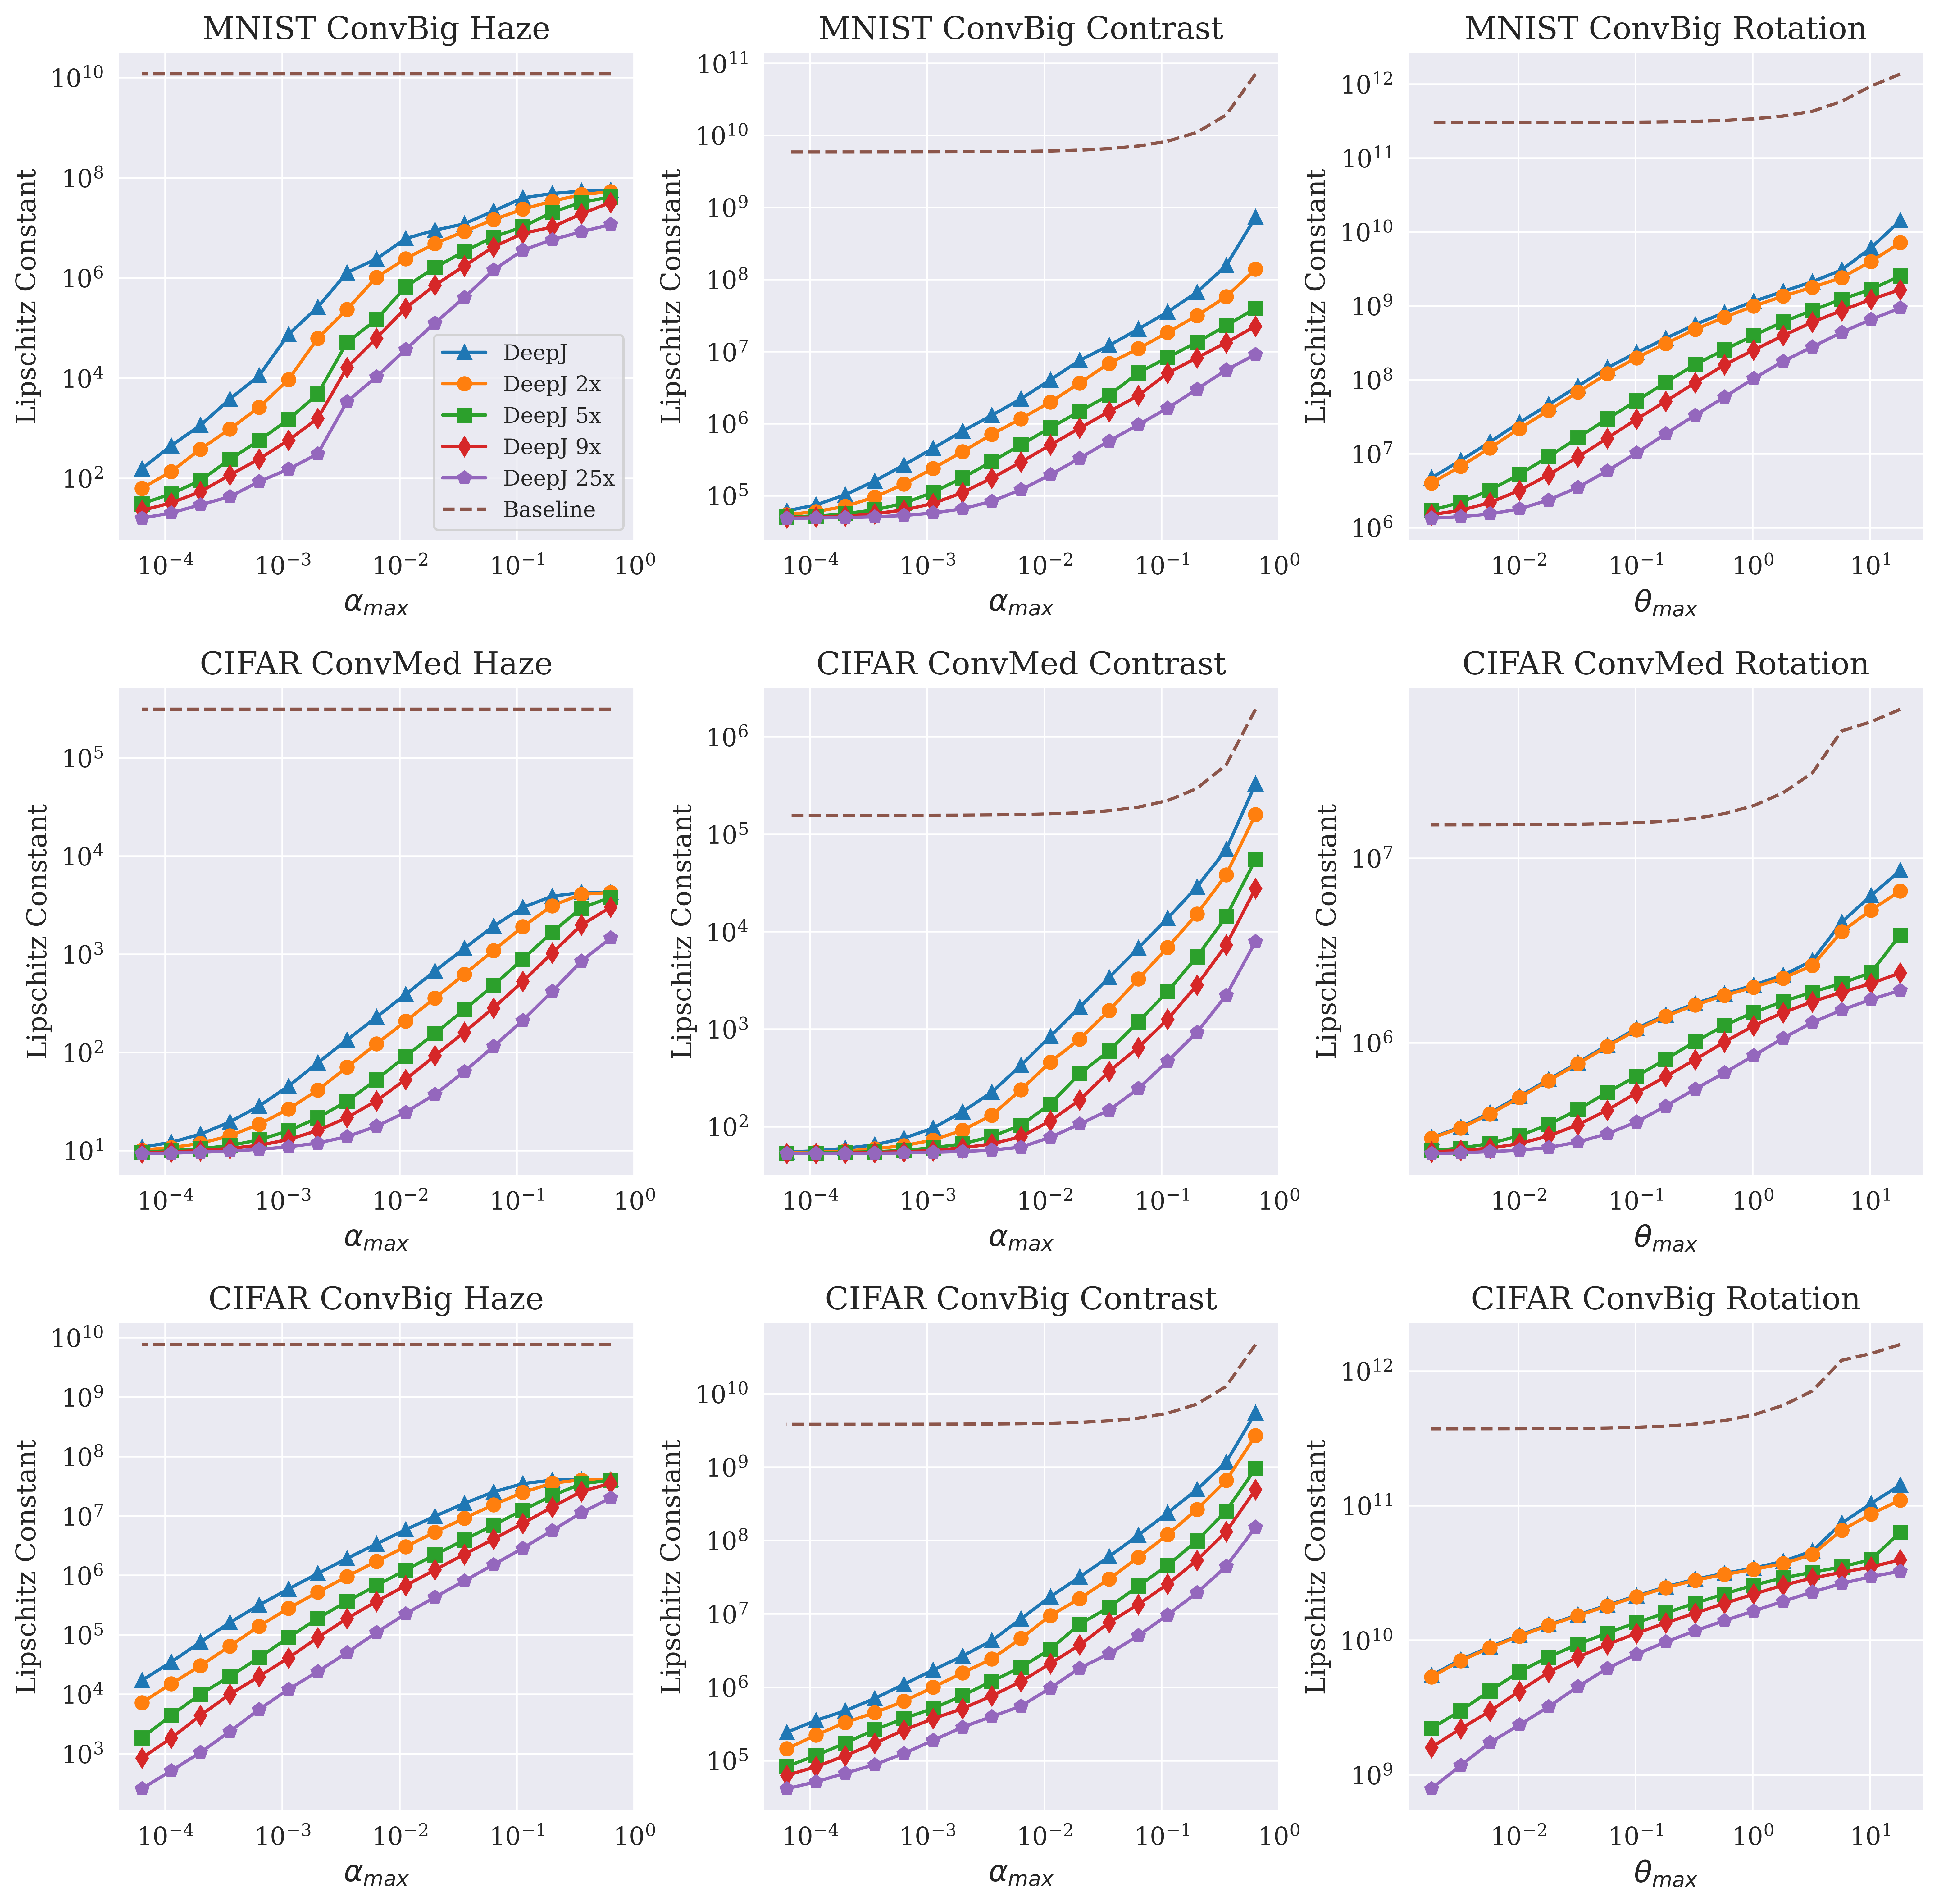

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

params = {'axes.labelsize': 12.5,
          'axes.titlesize': 14.5,
          'xtick.labelsize': 11.5,
          'ytick.labelsize': 11.5}
plt.rcParams.update(params)

sns.set_style("darkgrid", {'font.family':'serif', 'font.serif':'Times New Roman'})

tool = 'DeepJ'
fig, axs = plt.subplots(3, 3, figsize=(15, 15), dpi=500)
plt.subplots_adjust(hspace=0.3, wspace=0.25)

for dataset, net, i in [('MNIST','ConvBig', 0), ('CIFAR','ConvMed', 1), ('CIFAR','ConvBig', 2)]:
    for j, perturbation in enumerate(perturbations):
        if perturbation == 'ContrastVariation':
            axs[i, j].set_title(f'{dataset} {net} Contrast')
        else:
            axs[i, j].set_title(f'{dataset} {net} {perturbation}')
            
        if perturbation == 'Rotation':
            axs[i, j].set_xlabel(r'$\theta_{max}$', fontsize=13.75)
        else:
            axs[i, j].set_xlabel(r'$\alpha_{max}$', fontsize=13.75)
        axs[i, j].set_ylabel('Lipschitz Constant')
        axs[i, j].set_xscale('log')
        axs[i, j].set_yscale('log')

        interval_size, time, lc = zip(*all_data[dataset][net][perturbation])
        if perturbation == 'Rotation':
            interval_size = np.array(interval_size) * 57.2958  # to deg
        axs[i, j].plot(interval_size, lc, '-^', label=f'{tool}')
        
        interval_size, time, lc = zip(*all_data_splitting2[dataset][net][perturbation])
        if perturbation == 'Rotation':
            interval_size = np.array(interval_size) * 57.2958  # to deg
        axs[i, j].plot(interval_size, lc, '-o', label=f'{tool} 2x')

        interval_size, time, lc = zip(*all_data_splitting5[dataset][net][perturbation])
        if perturbation == 'Rotation':
            interval_size = np.array(interval_size) * 57.2958  # to deg
        axs[i, j].plot(interval_size, lc, '-s', label=f'{tool} 5x')
        
        interval_size, time, lc = zip(*all_data_splitting9[dataset][net][perturbation])
        if perturbation == 'Rotation':
            interval_size = np.array(interval_size) * 57.2958  # to deg
        axs[i, j].plot(interval_size, lc, '-d', label=f'{tool} 9x')
        
        interval_size, time, lc = zip(*all_data_splitting25[dataset][net][perturbation])
        if perturbation == 'Rotation':
            interval_size = np.array(interval_size) * 57.2958  # to deg
        axs[i, j].plot(interval_size, lc, '-p', label=f'{tool} 25x')
        
        baseline = df[(df['dataset'] == dataset) & (df['perturbation'] == perturbation)]
        interval_size = baseline['interval_size']
        if perturbation == 'Rotation':
            interval_size = np.array(interval_size) * 57.2958  # to deg
        axs[i, j].plot(interval_size, np.array(baseline['norm']) * normalize_constants[dataset] * network_baselines[net][dataset][0], '--', label='Baseline')
        
        if dataset == 'MNIST' and net == 'ConvBig' and perturbation == 'Haze':
            axs[i, j].legend()

plt.savefig('lipschitz_single_MAIN.png', bbox_inches='tight')

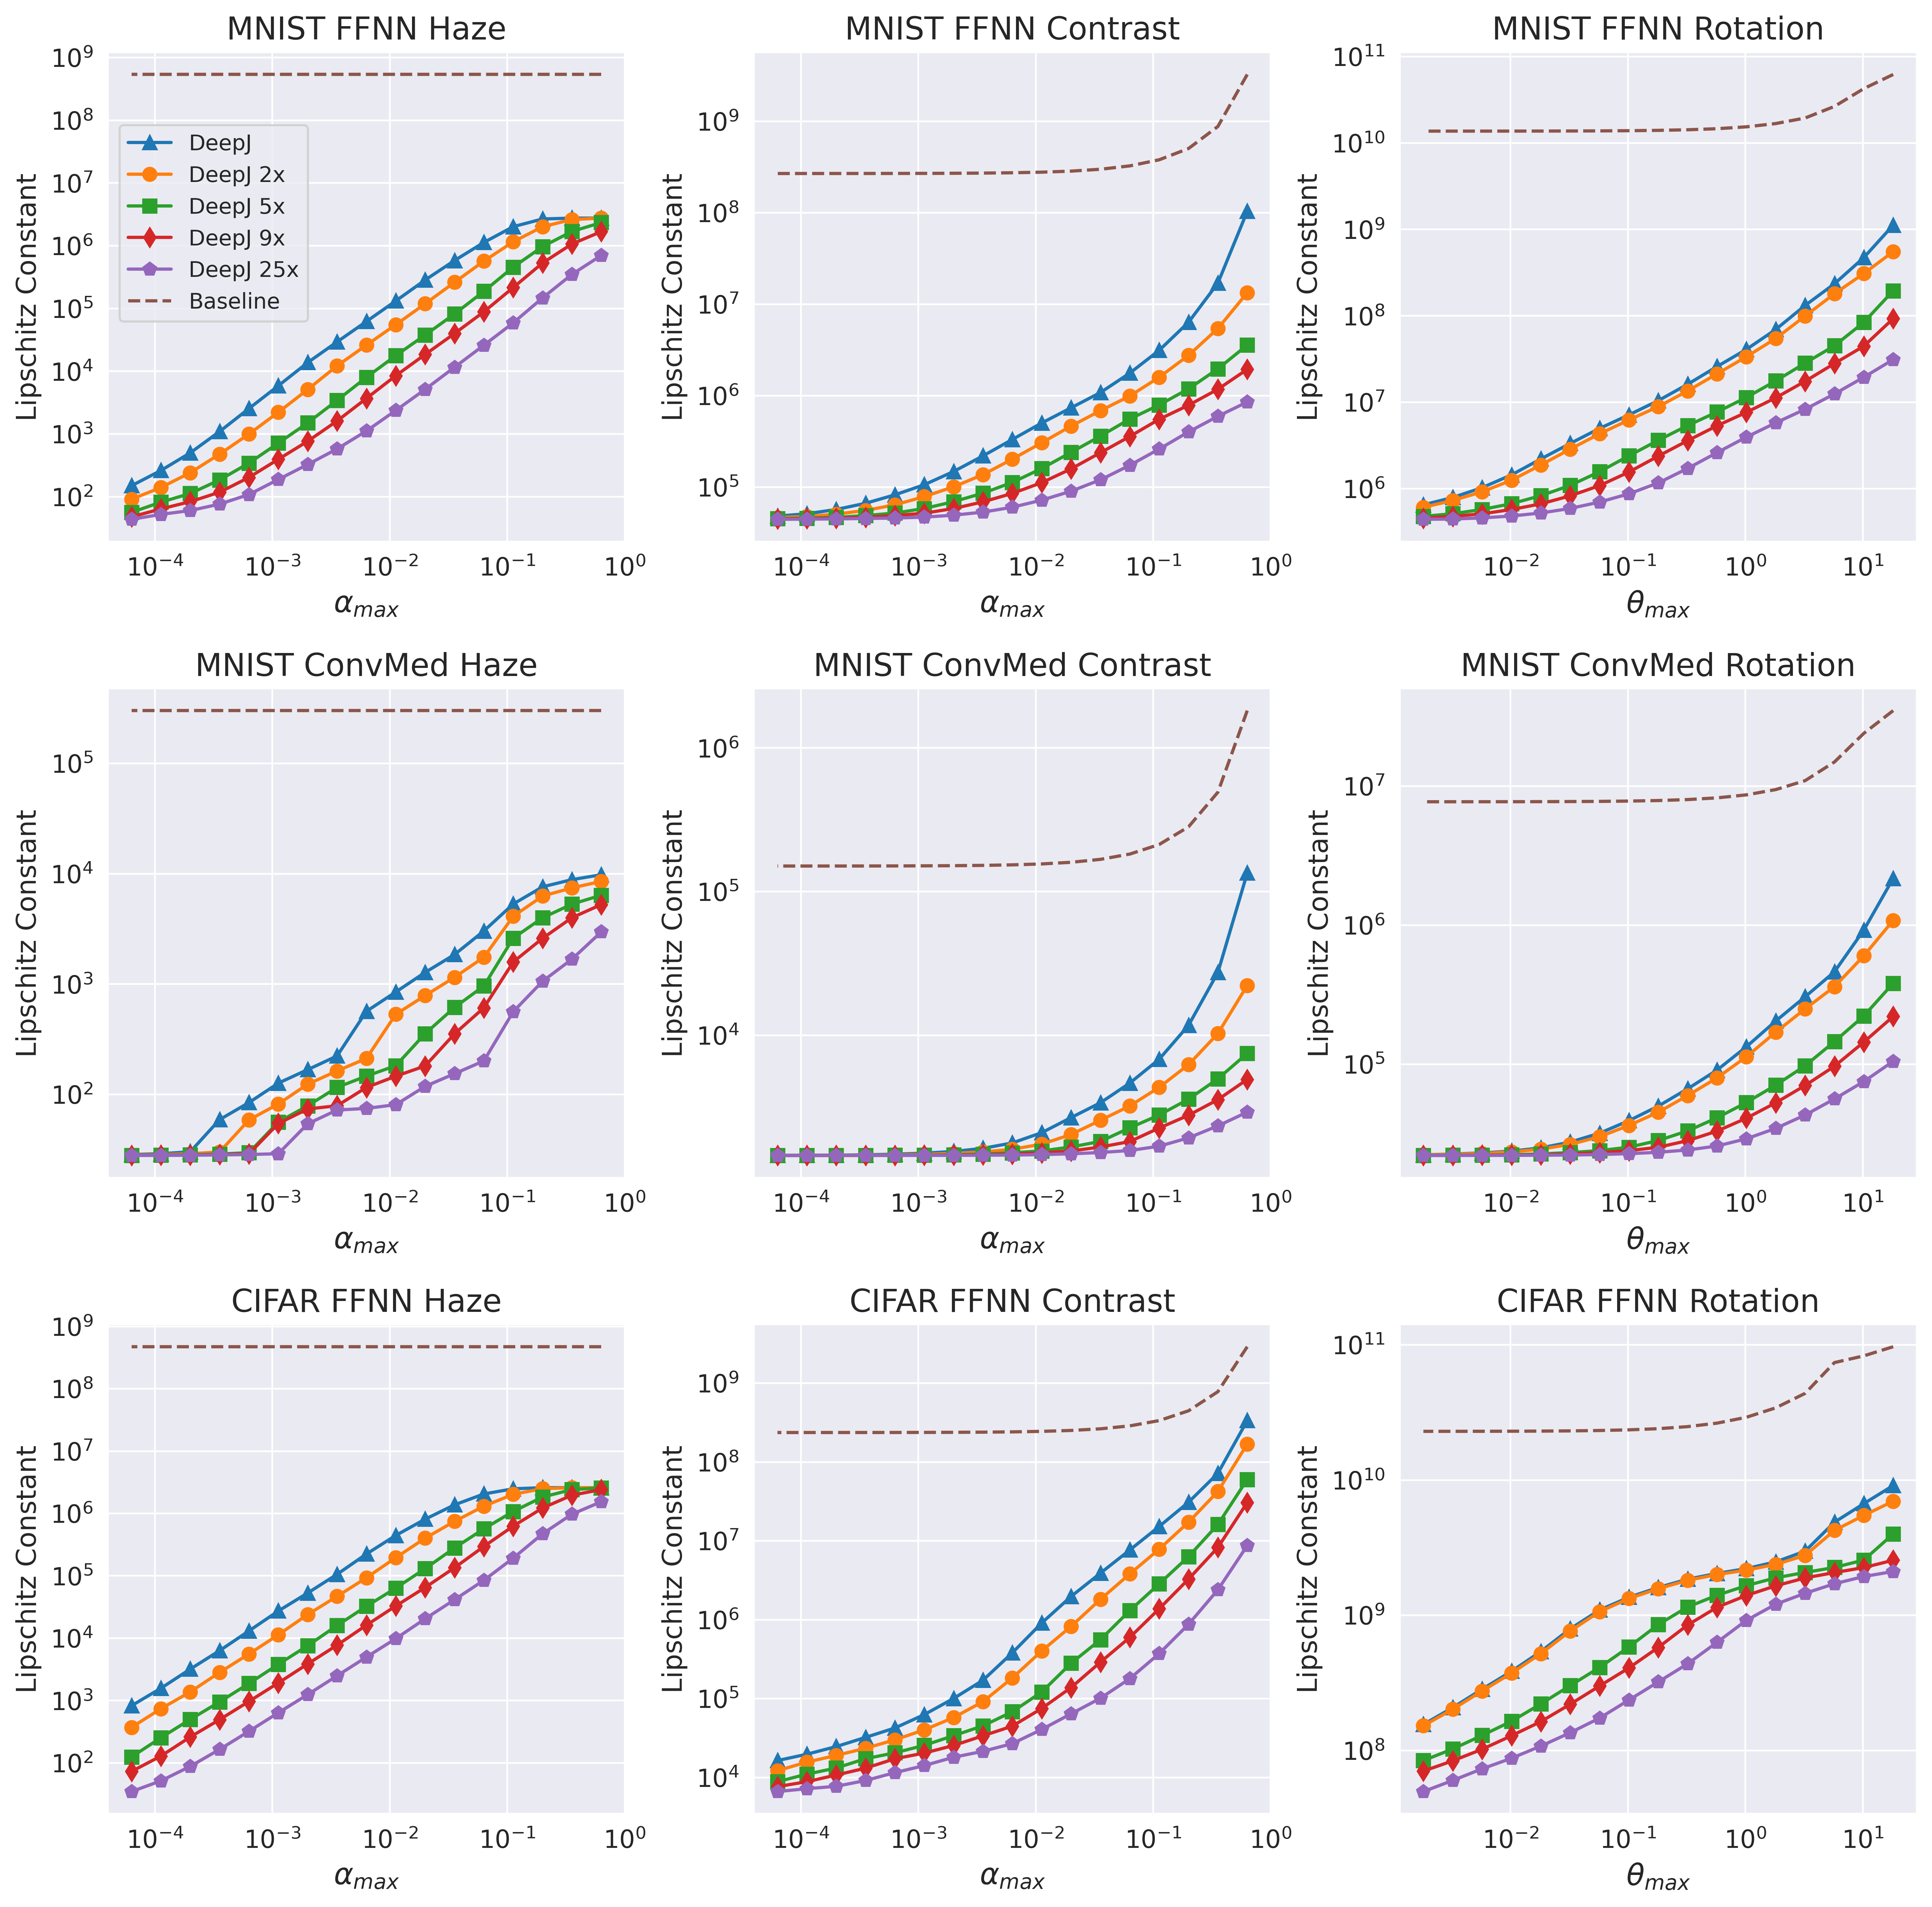

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

tool = 'DeepJ'
fig, axs = plt.subplots(3, 3, figsize=(15, 15), dpi=500)
plt.subplots_adjust(hspace=0.3, wspace=0.25)

for dataset, net, i in [('MNIST','FFNN',0), ('MNIST','ConvMed',1), ('CIFAR','FFNN',2)]:
    for j, perturbation in enumerate(perturbations):
        
        if perturbation == 'ContrastVariation':
            axs[i, j].set_title(f'{dataset} {net} Contrast')
        else:
            axs[i, j].set_title(f'{dataset} {net} {perturbation}')
        
        if perturbation == 'Rotation':
            axs[i, j].set_xlabel(r'$\theta_{max}$', fontsize=13.75)
        else:
            axs[i, j].set_xlabel(r'$\alpha_{max}$', fontsize=13.75)
        axs[i, j].set_ylabel('Lipschitz Constant')
        axs[i, j].set_xscale('log')
        axs[i, j].set_yscale('log')

        interval_size, time, lc = zip(*all_data[dataset][net][perturbation])
        if perturbation == 'Rotation':
            interval_size = np.array(interval_size) * 57.2958  # to deg
        axs[i, j].plot(interval_size, lc, '-^', label=f'{tool}')
        
        interval_size, time, lc = zip(*all_data_splitting2[dataset][net][perturbation])
        if perturbation == 'Rotation':
            interval_size = np.array(interval_size) * 57.2958  # to deg
        axs[i, j].plot(interval_size, lc, '-o', label=f'{tool} 2x')
        
        interval_size, time, lc = zip(*all_data_splitting5[dataset][net][perturbation])
        if perturbation == 'Rotation':
            interval_size = np.array(interval_size) * 57.2958  # to deg
        axs[i, j].plot(interval_size, lc, '-s', label=f'{tool} 5x')
        
        interval_size, time, lc = zip(*all_data_splitting9[dataset][net][perturbation])
        if perturbation == 'Rotation':
            interval_size = np.array(interval_size) * 57.2958  # to deg
        axs[i, j].plot(interval_size, lc, '-d', label=f'{tool} 9x')
        
        interval_size, time, lc = zip(*all_data_splitting25[dataset][net][perturbation])
        if perturbation == 'Rotation':
            interval_size = np.array(interval_size) * 57.2958  # to deg
        axs[i, j].plot(interval_size, lc, '-p', label=f'{tool} 25x')
        
        baseline = df[(df['dataset'] == dataset) & (df['perturbation'] == perturbation)]
        interval_size = baseline['interval_size']
        if perturbation == 'Rotation':
            interval_size = np.array(interval_size) * 57.2958  # to deg
        axs[i, j].plot(interval_size, np.array(baseline['norm']) * normalize_constants[dataset] * network_baselines[net][dataset][0], '--', label='Baseline')
        
        if dataset == 'MNIST' and net == 'FFNN' and perturbation == 'Haze':
            axs[i, j].legend(loc=(0.022, 0.45))

plt.savefig('lipschitz_single_APPENDIX.png', bbox_inches='tight')

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import median as med

sns.set_style("darkgrid")

# plt.style.use('ggplot')

tool = 'DeepJ'
dataset = 'CIFAR'

num_rows = 6
zeros = ('0\\\\' * num_rows)[:-2]
entries = (r'& \begin{tabular}[c]{@{}l@{}}' + zeros + r'\end{tabular} ') * 9

table = r"""
\begin{tabular}{c|ccc|ccc|ccc}
& \multicolumn{3}{c|}{Haze} & \multicolumn{3}{c|}{Contrast} & \multicolumn{3}{c}{Rotation} \\
& Min & Med & Max & Min & Med & Max & Min & Med & Max \\ 
\hline
""" + f"""
MNIST ConvBig {entries} \\\\
\hline
CIFAR ConvMed {entries} \\\\
\hline
CIFAR ConvBig {entries} \\\\
""" + r"""\end{tabular}"""

for dataset, net, i in [('MNIST','ConvBig', 0), ('CIFAR','ConvMed', 1), ('CIFAR','ConvBig', 2)]:
    for perturbation in perturbations:
        # DeepJ
        interval_size, time1, lc = zip(*all_data[dataset][net][perturbation])
        
        # DeepJ 2x
        interval_size, time2, lc = zip(*all_data_splitting2[dataset][net][perturbation])
        
        # Deep J 5x
        interval_size, time5, lc = zip(*all_data_splitting5[dataset][net][perturbation])
        
        # Deep J 9x
        interval_size, time9, lc = zip(*all_data_splitting9[dataset][net][perturbation])
        
        # Deep J 25x
        interval_size, time25, lc = zip(*all_data_splitting25[dataset][net][perturbation])
        
        baseline = df[(df['dataset'] == dataset) & (df['perturbation'] == perturbation)]
        timebase = baseline['time']
        timebase += network_baselines[net][dataset][1]
        
        baseline_round = 2
        if perturbation == 'Rotation':
            baseline_round = 1
        table = table.replace(zeros, f'{round(min(time1)/1000, 1)}\\\\{round(min(time2)/1000, 1)}\\\\{round(min(time5)/1000, 1)}\\\\{round(min(time9)/1000, 1)}\\\\{round(min(time25)/1000, 1)}\\\\{round(min(timebase)/1000, baseline_round)}', 1)
        table = table.replace(zeros, f'{round(med(time1)/1000, 1)}\\\\{round(med(time2)/1000, 1)}\\\\{round(med(time5)/1000, 1)}\\\\{round(med(time9)/1000, 1)}\\\\{round(med(time25)/1000, 1)}\\\\{round(med(timebase)/1000, baseline_round)}', 1)
        table = table.replace(zeros, f'{round(max(time1)/1000, 1)}\\\\{round(max(time2)/1000, 1)}\\\\{round(max(time5)/1000, 1)}\\\\{round(max(time9)/1000, 1)}\\\\{round(max(time25)/1000, 1)}\\\\{round(max(timebase)/1000, baseline_round)}', 1)
        
print(table)


\begin{tabular}{c|ccc|ccc|ccc}
& \multicolumn{3}{c|}{Haze} & \multicolumn{3}{c|}{Contrast} & \multicolumn{3}{c}{Rotation} \\
& Min & Med & Max & Min & Med & Max & Min & Med & Max \\ 
\hline

MNIST ConvBig & \begin{tabular}[c]{@{}l@{}}10.4\\20.6\\51.1\\91.5\\254.0\\0.05\end{tabular} & \begin{tabular}[c]{@{}l@{}}10.9\\21.1\\51.8\\101.5\\258.8\\0.06\end{tabular} & \begin{tabular}[c]{@{}l@{}}11.7\\21.9\\57.4\\391.8\\397.2\\0.07\end{tabular} & \begin{tabular}[c]{@{}l@{}}10.3\\20.4\\50.7\\91.4\\252.7\\0.04\end{tabular} & \begin{tabular}[c]{@{}l@{}}10.5\\20.7\\51.1\\93.1\\282.0\\0.06\end{tabular} & \begin{tabular}[c]{@{}l@{}}10.9\\21.4\\53.6\\359.9\\489.5\\0.08\end{tabular} & \begin{tabular}[c]{@{}l@{}}24.5\\48.9\\79.4\\134.4\\352.3\\13.6\end{tabular} & \begin{tabular}[c]{@{}l@{}}24.8\\49.2\\80.1\\141.9\\379.7\\14.0\end{tabular} & \begin{tabular}[c]{@{}l@{}}130.5\\129.8\\127.4\\311.5\\689.5\\114.9\end{tabular}  \\
\hline
CIFAR ConvMed & \begin{tabular}[c]{@{}l@{}}0.9\\1.7\\4.1\\7.3\\20.1\\0.